In [2]:
import numpy as np
def F(x1, x2):
    return np.sin(np.pi * x1 / 2.0) * np.cos(np.pi * x2 / 4.0)

A = 2
nb_samples = 1000
X_train = np.random.uniform(-A, +A, (nb_samples, 2))
Y_train = np.vectorize(F)(X_train[:,0], X_train[:,1])

In [4]:
X_train.shape

(1000, 2)

In [4]:
from keras.models import Sequential
model = Sequential()

Using TensorFlow backend.


In [6]:
from keras.layers import Dense, Activation

nb_neurons = 20
model.add(Dense(nb_neurons, input_shape=(2,)))
model.add(Activation('relu'))
model.add(Dense(1))

In [11]:
from keras.optimizers import SGD

sgd = SGD(lr=0.01,
decay=1e-6, momentum=0.9,
nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

In [12]:
model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 0s 372us/step - loss: 0.0538 - acc: 0.0000e+00
Epoch 2/10
1000/1000 [==============================] - 0s 84us/step - loss: 0.0525 - acc: 0.0000e+00
Epoch 3/10
1000/1000 [==============================] - 0s 76us/step - loss: 0.0532 - acc: 0.0000e+00
Epoch 4/10
1000/1000 [==============================] - 0s 64us/step - loss: 0.0516 - acc: 0.0000e+00
Epoch 5/10
1000/1000 [==============================] - 0s 60us/step - loss: 0.0504 - acc: 0.0000e+00
Epoch 6/10
1000/1000 [==============================] - 0s 72us/step - loss: 0.0487 - acc: 0.0000e+00
Epoch 7/10
1000/1000 [==============================] - 0s 72us/step - loss: 0.0490 - acc: 0.0000e+00
Epoch 8/10
1000/1000 [==============================] - 0s 60us/step - loss: 0.0471 - acc: 0.0000e+00
Epoch 9/10
1000/1000 [==============================] - 0s 72us/step - loss: 0.0472 - acc: 0.0000e+00
Epoch 10/10
1000/1000 [==============================] - 0s 64us/step - loss: 0.0

In [13]:
x = [1.5, 0.5]
print(F(x[0], x[1]))
x = np.array(x).reshape(1, 2)
print(x)
print( model.predict(x) )
print( model.predict(x)[0][0] )

0.653281482438
[[ 1.5  0.5]]
[[ 0.53107703]]
0.531077


In [14]:
Width = 200
Height = 200
U = np.linspace(-A, +A, Width)
V = np.linspace(-A, +A, Height)
# Computes cartesian product between U and V:
UV = np.transpose([np.tile(U, len(V)), np.repeat(V, len(U))])
print(UV)
ys = model.predict(UV)
print(ys)
I = ys.reshape(Width, Height)

[[-2.         -2.        ]
 [-1.9798995  -2.        ]
 [-1.95979899 -2.        ]
 ..., 
 [ 1.95979899  2.        ]
 [ 1.9798995   2.        ]
 [ 2.          2.        ]]
[[-0.44436407]
 [-0.44590449]
 [-0.44744486]
 ..., 
 [ 0.03020266]
 [ 0.02462184]
 [ 0.01904133]]


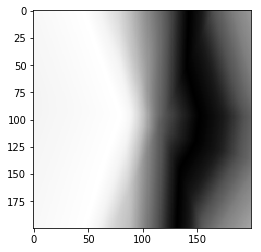

In [15]:
I = ys.reshape(Width, Height)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#Make imageplotlib show the images inline
#in Jupyter notebooks:
%matplotlib inline
plt.imshow(I, cmap = cm.Greys)